In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# %matplotlib inline
# %matplotlib widget

In [3]:


import numpy as np
import cv2
import matplotlib.pyplot as plt
# from ipywidgets import interact, widgets
import ipywidgets as widgets
import IPython.display as Disp
# from ipywidgets import *


class Threshold():
    def __init__(self, conf_file, image_file, region_id):
        
        self.conf_data = np.load(conf_file)
        self.image_data = np.load(image_file)[:,:,:3]
        self.region_id = region_id
        
        
        # Button used to Save Image
        self.save_button = widgets.Button(value=False, description='Save Forest Labels',
                                                disabled=False, button_style='success', 
                                                tooltip='Description', icon='floppy-o')

        #Link button to callback fuction
        self.save_button.on_click(self.button_click)
        
        Disp.display(self.save_button)
        
        # Create an interactive slider
        threshold_slider = widgets.FloatSlider(
            value=0.5,
            min=0,
            max=1.0,
            step=0.01,
            description='Threshold:'
        )
        
        widgets.interact(self.threshold_image, threshold = threshold_slider)

    def button_click(self, _):
        labels_path = f"./forest/labels_arr/Region_{self.region_id}_forest_{self.threshold}.npy"

        #Write file to disc
        np.save(labels_path, self.thresholded_labels)



    def threshold_image(self, threshold):
        print(threshold)
        # Apply thresholding
        self.thresholded_labels = (self.conf_data < threshold).astype(int)
        
        self.threshold = threshold
        thresholded_image = np.expand_dims(self.thresholded_labels, axis=-1)
        thresholded_image = thresholded_image*np.array([ [ [0, 255, 0] ] ])
        combined = (thresholded_image).astype('uint8')
        blended = cv2.addWeighted(self.image_data, 0.9, combined, 0.22, 0, dtype=1).astype('uint8')
    
        #     plt.figure(figsize=(10,10))
        #     plt.imshow(blended)

        #     imagePlotter(thresholded_image)
            # Display the thresholded image
        #     plt.imshow(thresholded_image, interpolation='nearest')
        plt.figure(figsize=(10,10))
        plt.imshow(blended)
        plt.title(f'Threshold: {threshold}')
        plt.show()



# Connect the slider to the interactive function
# interact(threshold_image, threshold=threshold_slider)





In [41]:
REGION_ID = 9
conf_file = f"./forest/conf_arr/Region_{REGION_ID}_conf.npy"
image_file = f"./repo/Features_7_Channels/Region_{REGION_ID}_Features7Channel.npy"

thresh = Threshold(conf_file, image_file, REGION_ID)

Button(button_style='success', description='Save Forest Labels', icon='floppy-o', style=ButtonStyle(), tooltip…

interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=1.0, step=0.01), Output()), _dom_cl…

In [42]:
plt.imshow(np.load("./forest/labels_arr/Region_1_forest_0.52.npy"))

In [15]:
pred_forest = np.load("../R1_pred_np.npy")

In [16]:
pred_forest = pred_forest.astype("float32")
new_arr = np.zeros((pred_forest.shape[0], pred_forest.shape[1], 3), dtype=np.uint8)
new_arr[:,:,1] = pred_forest*255

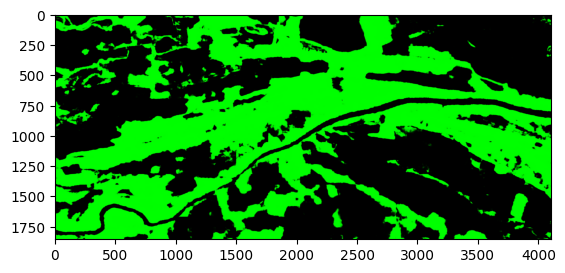

In [17]:
plt.imshow(new_arr)

In [18]:
new_arr

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0, 254,   0],
        [  0, 254,   0],
        [  0, 254,   0],
        ...,
        [  0,   8,   0],
        [  0,   7,   0],
        [  0,   6,   0]],

       [[  0, 254,   0],
        [  0, 254,   0],
        [  0, 254,   0],
        ...,
        [  0,  18,   0],
        [  0,  16,   0],
        [  0,  11,   0]],

       [[  0, 254,   0],
        [  0, 254,   0],
        [  0, 254,   0],
        ...,
        [  0,  35,   0],
        [  0,  29,   0],
        [  0,  19,   0]]

In [7]:
pred_for = cv2.imread("../R1_Forest_color.png")

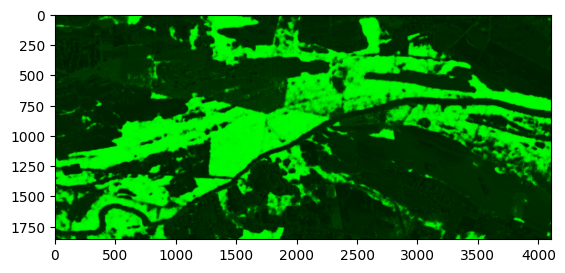

In [8]:
plt.imshow(pred_for)

In [9]:
pred_for

array([[[ 0, 44,  0],
        [ 0, 44,  0],
        [ 0, 44,  0],
        ...,
        [ 0, 50,  0],
        [ 0, 50,  0],
        [ 0, 54,  0]],

       [[ 0, 45,  0],
        [ 0, 44,  0],
        [ 0, 45,  0],
        ...,
        [ 0, 46,  0],
        [ 0, 48,  0],
        [ 0, 50,  0]],

       [[ 0, 45,  0],
        [ 0, 44,  0],
        [ 0, 44,  0],
        ...,
        [ 0, 47,  0],
        [ 0, 48,  0],
        [ 0, 50,  0]],

       ...,

       [[ 0, 41,  0],
        [ 0, 37,  0],
        [ 0, 39,  0],
        ...,
        [ 0, 40,  0],
        [ 0, 40,  0],
        [ 0, 40,  0]],

       [[ 0, 39,  0],
        [ 0, 35,  0],
        [ 0, 31,  0],
        ...,
        [ 0, 41,  0],
        [ 0, 41,  0],
        [ 0, 41,  0]],

       [[ 0, 37,  0],
        [ 0, 34,  0],
        [ 0, 35,  0],
        ...,
        [ 0, 42,  0],
        [ 0, 42,  0],
        [ 0, 43,  0]]], dtype=uint8)